In [ ]:
import tensorflow as tf
print(tf.test.gpu_device_name())

#test the nvidia cuda version
!nvidia-smi

/device:GPU:0
Tue Dec  6 11:14:42 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P0    28W /  70W |    312MiB / 15109MiB |      1%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                          

In [ ]:
#open 
import os
print(os.listdir('/content/drive/MyDrive/'))

['anime', 'PSX_20171031_210221.jpg', 'PSX_20171031_210221.jpg.gdoc', '62a1b184e18d158204a517d93d23c2cd.jpg', 'VID-20180613-WA0032.mp4', 'Untitled document (3).gdoc', 'Untitled document (2).gdoc', 'Vlog1.mp4', 'VID-20190120-WA0015.mp4', 'IMG-20181019-WA0000.jpg', 'IMG-20181216-WA0010.jpg', 'Remmmmmm.ai', 'Spicy Registration (Responses).gsheet', 'Biotech poster take 2.ai', 'Biotechposter.png', 'Biotech Beach BBQ Dinner Party.gform', 'IMG_20191108_035653.jpg', 'IMG_20191127_142158.jpg', 'Copy of Biotech Club Committee (2019) Roles and responsibilities– write your name after your role.gdoc', 'HTMKQF31C79.pdf', 'Untitled document (1).gdoc', 'Video from 25', 'Photography ', 'IMG_20200305_092855.jpg', 'DADKKWPOGJKA.png', 'HTMKQF31A80.pdf', 'IMG_20200207_183453.jpg', 'J.K. Rowling - Harry Potter And The Chamber Of Secrets (Turtleback School & Library Binding Edition). 2-Turtleback (2000).pdf', "J. K. Rowling - Harry Potter and the Sorcerer's Stone (1999).pdf", 'Bookclub Ideas.gdoc', 'Chapter 1

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing**

In [2]:
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from sklearn.metrics import confusion_matrix, classification_report
from keras.callbacks import EarlyStopping, ModelCheckpoint

**Data Path Processing**

In [ ]:
#unzip folders
import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/AML_Assignment_2/train.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/AML_Assignment_2/')

FileNotFoundError: ignored

In [ ]:
#check class number
print(len(os.listdir('/content/drive/MyDrive/AML_Assignment_2')))
print(len(os.listdir('/content/drive/MyDrive/AML_Assignment_2/list')))
print(len(os.listdir('/content/drive/MyDrive/AML_Assignment_2/test')))
print(len(os.listdir('/content/drive/MyDrive/AML_Assignment_2/train/herbarium')))


6
6
100
100


**Image Pre-processing**

In [ ]:
#defines the image height, width and channel 
img_height, img_width, img_ch = 256, 256, 3

#defines the batch size 
batch_size = 32

#epochs - number of loops thru training set
epochs = 15

#file path from directory
dir_tr ='/content/drive/MyDrive/AML_Assignment_2/train/herbarium'
dir_test ='/content/drive/MyDrive/AML_Assignment_2/test'
dir_lis = '/content/drive/MyDrive/AML_Assignment_2/list'

#imagedatagenrator from tensorflow - real time augmentation of images (train)
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

#imagedatagenrator from tensorflow - real time augmentation of images (test)
test_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True) 

#saving to a variable the loading of the image dataset in memory and creating batches 
#of augmented images from file path
train_generator = train_datagen.flow_from_directory(
        dir_tr,
        target_size=(img_height, img_width),
        batch_size=batch_size,  
        class_mode='categorical')

#saving to a variable the loading of the image dataset in memory and creating batches 
#of augmented images from file path
test_generator = test_datagen.flow_from_directory(
        dir_test,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical')

#puts into a variable the images followed by the labels with next to move next into the array
images, labels = next(train_generator)

#print out the labels
#train_generator.class_indices

Found 3612 images belonging to 100 classes.
Found 1339 images belonging to 100 classes.


**Matplotlib shows images**

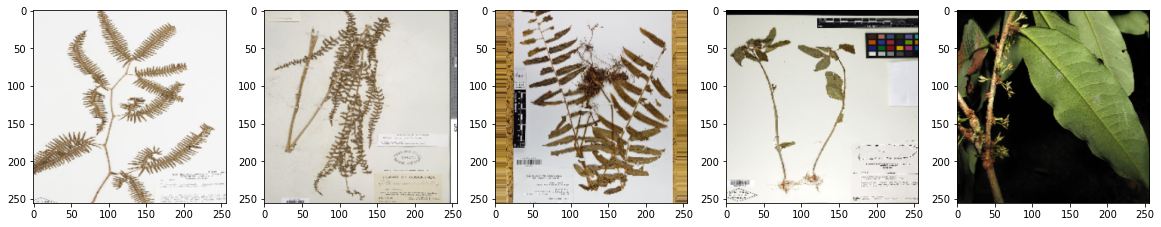

In [ ]:
#using matplotlib create a figure object
plt.figure(figsize=(20, 20))#configure the figure size to a width of 20 and height of 20

#display the image sets from the train data set
n = 5  #how any plots will be displayed
#using a forloop for the amount of plots
for i in range(n):
    # display original
    ax = plt.subplot(2,n, i + 1)
    #display the data as an image based on the forloop
    plt.imshow(images[i])
    #show the axis 
    ax.get_xaxis().set_visible(True)
    ax.get_yaxis().set_visible(True)

plt.show()

**Early Stopping and save model**

In [ ]:
#setting up early stopping to prevent overfitting
callbacks = EarlyStopping(monitor ='val_loss',
                          patience = 5,
                          verbose = 1,
                          mode = 'auto')

#save the best trained model
best_model_file_path = '/content/drive/MyDrive/AML_Assignment_2/Saved_Best_Model/model_epoch_accuracy.h5'
best_model = ModelCheckpoint(best_model_file_path,
                             monitor = 'val_accuracy',
                             verbose = 1,
                             save_best_only = True)

**Building Model**

In [ ]:
model = Sequential([
                    Conv2D(32, (3, 3), activation='relu', input_shape = (img_height, img_width, img_ch)),
                    BatchNormalization(),
                    MaxPooling2D(2, 2),

                    Conv2D(64, (3, 3), activation='relu'),
                    BatchNormalization(),
                    MaxPooling2D(2, 2),

                    Conv2D(128, (3, 3), activation='relu'),
                    BatchNormalization(),
                    MaxPooling2D(2, 2),
                    Dropout(0.5),

                    Flatten(),
                    Dense(128, activation = 'relu'),
                    Dense(100, activation='softmax')])

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch = train_generator.n//train_generator.batch_size,
                    validation_data = test_generator,
                    validation_steps = test_generator.n//test_generator.batch_size,
                    epochs = 15,
                    verbose = 1,
                    callbacks = [best_model],
                    workers=8)

Epoch 1/15
112/112 [==============================] - ETA: 0s - loss: 5.8680 - accuracy: 0.0103
Epoch 1: val_accuracy improved from -inf to 0.01220, saving model to /content/drive/MyDrive/AML_Assignment_2/Saved_Best_Model/model_epoch_accuracy.h5
112/112 [==============================] - 416s 3s/step - loss: 5.8680 - accuracy: 0.0103 - val_loss: 16.8471 - val_accuracy: 0.0122
Epoch 2/15
112/112 [==============================] - ETA: 0s - loss: 4.6485 - accuracy: 0.0103
Epoch 2: val_accuracy did not improve from 0.01220
112/112 [==============================] - 96s 818ms/step - loss: 4.6485 - accuracy: 0.0103 - val_loss: 5.8459 - val_accuracy: 0.0122
Epoch 3/15
112/112 [==============================] - ETA: 0s - loss: 4.6479 - accuracy: 0.0087
Epoch 3: val_accuracy did not improve from 0.01220
112/112 [==============================] - 96s 824ms/step - loss: 4.6479 - accuracy: 0.0087 - val_loss: 13.1158 - val_accuracy: 0.0107
Epoch 4/15
112/112 [==============================] - ETA:

# Siamese network


**Import Libraries**


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
from pathlib import Path
from keras import applications
from keras import layers
from keras import losses
from keras import optimizers
from keras import metrics
from keras import Model
from keras.applications import resnet

**Image Pre Processing**

In [5]:
#unzip folders
import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/AML_Assignment_2/AML_project.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/AML_Assignment_2/AML_project')

In [14]:
#defines the image height, width and channel 
img_height, img_width, img_ch = 256, 256, 3

target_shape = (img_height,img_width)

#defines the batch size 
batch_size = 32

#epochs - number of loops thru training set
epochs = 15


#file path from directory
dir_img_train_anchor = "/content/drive/MyDrive/AML_Assignment_2/AML_project/train/herbarium"
dir_img_train_positive = "/content/drive/MyDrive/AML_Assignment_2/AML_project/train/photo"
#dir_img_test = "/content/drive/MyDrive/AML_Assignment_2/AML_project/test"
dir_img_test = "/content/drive/MyDrive/AML_Assignment_2/test"

#imagedatagenrator from tensorflow - real time augmentation of images (anchor/herb)
train_anchor_herb_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

#imagedatagenrator from tensorflow - real time augmentation of images (positive/field)
train_positive_field_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

#imagedatagenrator from tensorflow - real time augmentation of images (test)
test_field_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True) 

#saving to a variable the loading of the image dataset in memory and creating batches 
#of augmented images from file path
train_anchor_herb_generator = train_anchor_herb_datagen.flow_from_directory(
        dir_img_train_anchor,
        target_size=(img_height, img_width),
        batch_size=batch_size,  
        class_mode='categorical')

print(type(train_anchor_herb_generator))

train_positive_field_generator = train_positive_field_datagen.flow_from_directory(
        dir_img_train_positive,
        target_size=(img_height, img_width),
        batch_size=batch_size,  
        class_mode='categorical')

print(type(train_positive_field_generator))

#saving to a variable the loading of the image dataset in memory and creating batches 
#of augmented images from file path
test_generator = test_field_datagen.flow_from_directory(
        dir_img_test,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical')

print(type(test_generator))

#puts into a variable the images followed by the labels with next to move next into the array
images_train_anchor_herb, labels_train_anchor_herb = next(train_anchor_herb_generator)
images_train_positive_field, labels_train_positive_field = next(train_positive_field_generator)

#print out the labels
# train_generator.class_indices

Found 3700 images belonging to 100 classes.
<class 'keras.preprocessing.image.DirectoryIterator'>
Found 1044 images belonging to 60 classes.
<class 'keras.preprocessing.image.DirectoryIterator'>
Found 1339 images belonging to 100 classes.
<class 'keras.preprocessing.image.DirectoryIterator'>


In [15]:

def preprocess_image(filename):
    """
    Load the specified file as a JPEG image, preprocess it and
    resize it to the target shape.
    """

    image_string = tf.io.read_file(filename)
    image = tf.image.decode_jpeg(image_string, channels=3)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image, target_shape)
    return image


def preprocess_triplets(anchor, positive, negative):
    """
    Given the filenames corresponding to the three images, load and
    preprocess them.
    """

    return (
        preprocess_image(anchor),
        preprocess_image(positive),
        preprocess_image(negative),
    )


In [19]:
#defines the image height, width and channel 
img_height, img_width, img_ch = 256, 256, 3

target_shape = (img_height,img_width)

#defines the batch size 
batch_size = 32

#epochs - number of loops thru training set
epochs = 15

#file path from directory
dir_img_train_anchor = "/content/drive/MyDrive/AML_Assignment_2/AML_project/train/herbarium"
dir_img_train_positive = "/content/drive/MyDrive/AML_Assignment_2/AML_project/train/photo"
#dir_img_test = "/content/drive/MyDrive/AML_Assignment_2/AML_project/test"
dir_img_test = "/content/drive/MyDrive/AML_Assignment_2/test"

# We need to make sure both the anchor and positive images are loaded in
# sorted order so we can match them together.

print(os.listdir(dir_img_train_anchor))


anchor_images = sorted(
    [str(dir_img_train_anchor / f) for f in os.listdir(dir_img_train_anchor)]
)

positive_images = sorted(
    [str(dir_img_train_positive / f) for f in os.listdir(dir_img_train_positive)]
)

image_count = len(anchor_images)

anchor_dataset = tf.data.Dataset.from_tensor_slices(anchor_images)
positive_dataset = tf.data.Dataset.from_tensor_slices(positive_images)

# To generate the list of negative images, let's randomize the list of
# available images and concatenate them together.
rng = np.random.RandomState(seed=42)
rng.shuffle(anchor_images)
rng.shuffle(positive_images)

negative_images = anchor_images + positive_images
np.random.RandomState(seed=32).shuffle(negative_images)

negative_dataset = tf.data.Dataset.from_tensor_slices(negative_images)
negative_dataset = negative_dataset.shuffle(buffer_size=4096)

dataset = tf.data.Dataset.zip((anchor_dataset, positive_dataset, negative_dataset))
dataset = dataset.shuffle(buffer_size=1024)
dataset = dataset.map(preprocess_triplets)

# Let's now split our dataset in train and validation.
train_dataset = dataset.take(round(image_count * 0.8))
val_dataset = dataset.skip(round(image_count * 0.8))

train_dataset = train_dataset.batch(32, drop_remainder=False)
train_dataset = train_dataset.prefetch(8)

val_dataset = val_dataset.batch(32, drop_remainder=False)
val_dataset = val_dataset.prefetch(8)


['127151', '127007', '127097', '125412', '126895', '141068', '140367', '138662', '136761', '13370', '133617', '133595', '13330', '13325', '13276', '132431', '132476', '132501', '132113', '132107', '131079', '131736', '130657', '129645', '12922', '12910', '127242', '149919', '149682', '149264', '148977', '148220', '145020', '144394', '14401', '143758', '143706', '14353', '143496', '142736', '142550', '141336', '141332', '105951', '106023', '106387', '106461', '106466', '110432', '116853', '119986', '120497', '121836', '121841', '12254', '12518', '150135', '15014', '151469', '151593', '15318', '15330', '15355', '156516', '156526', '158341', '158592', '158653', '158736', '158793', '158833', '159434', '159516', '159518', '160570', '166822', '166869', '169293', '171727', '173914', '173972', '174017', '177730', '177775', '189669', '191642', '19165', '192311', '194035', '19489', '209328', '211059', '244705', '248392', '254180', '275029', '280085', '280698', '285398', '29686']


TypeError: ignored

**Training**

**Embedding Genrator**

In [28]:
# base_cnn = resnet.ResNet50(
#     weights="imagenet", input_shape=target_shape + (3,), include_top=False
# )

base_cnn = tf.keras.applications.InceptionResNetV2(include_top = False,
                                                    weights = 'imagenet',
                                                    input_shape=(256, 256,3))


flatten = layers.Flatten()(base_cnn.output)
dense1 = layers.Dense(512, activation="relu")(flatten)
dense1 = layers.BatchNormalization()(dense1)
dense2 = layers.Dense(256, activation="relu")(dense1)
dense2 = layers.BatchNormalization()(dense2)
output = layers.Dense(256)(dense2)

embedding = Model(base_cnn.input, output, name="Embedding")

print(embedding.summary()) 
# trainable = False
# for layer in base_cnn.layers:
#     if layer.name == "conv5_block1_out":
#         trainable = True
#     layer.trainable = trainable

#freeze layers
base_cnn.trainable = False

Model: "Embedding"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_781 (Conv2D)            (None, 127, 127, 32  864         ['input_6[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_788 (Batch  (None, 127, 127, 32  96         ['conv2d_781[0][0]']             
 Normalization)                 )                                                         

**Model**

In [21]:
class DistanceLayer(layers.Layer):
    """
    This layer is responsible for computing the distance between the anchor
    embedding and the positive embedding, and the anchor embedding and the
    negative embedding.
    """

    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def call(self, anchor, positive, negative):
        ap_distance = tf.reduce_sum(tf.square(anchor - positive), -1)
        an_distance = tf.reduce_sum(tf.square(anchor - negative), -1)
        return (ap_distance, an_distance)


anchor_input = layers.Input(name="anchor", shape=target_shape + (3,))
positive_input = layers.Input(name="positive", shape=target_shape + (3,))
negative_input = layers.Input(name="negative", shape=target_shape + (3,))

distances = DistanceLayer()(
    embedding(resnet.preprocess_input(anchor_input)),
    embedding(resnet.preprocess_input(positive_input)),
    embedding(resnet.preprocess_input(negative_input)),
)

siamese_network = Model(
    inputs=[anchor_input, positive_input, negative_input], outputs=distances
)

**Mean Metric**

In [22]:

class SiameseModel(Model):
    """The Siamese Network model with a custom training and testing loops.

    Computes the triplet loss using the three embeddings produced by the
    Siamese Network.

    The triplet loss is defined as:
       L(A, P, N) = max(‖f(A) - f(P)‖² - ‖f(A) - f(N)‖² + margin, 0)
    """

    def __init__(self, siamese_network, margin=0.5):
        super(SiameseModel, self).__init__()
        self.siamese_network = siamese_network
        self.margin = margin
        self.loss_tracker = metrics.Mean(name="loss")

    def call(self, inputs):
        return self.siamese_network(inputs)

    def train_step(self, data):
        # GradientTape is a context manager that records every operation that
        # you do inside. We are using it here to compute the loss so we can get
        # the gradients and apply them using the optimizer specified in
        # `compile()`.
        with tf.GradientTape() as tape:
            loss = self._compute_loss(data)

        # Storing the gradients of the loss function with respect to the
        # weights/parameters.
        gradients = tape.gradient(loss, self.siamese_network.trainable_weights)

        # Applying the gradients on the model using the specified optimizer
        self.optimizer.apply_gradients(
            zip(gradients, self.siamese_network.trainable_weights)
        )

        # Let's update and return the training loss metric.
        self.loss_tracker.update_state(loss)
        return {"loss": self.loss_tracker.result()}

    def test_step(self, data):
        loss = self._compute_loss(data)

        # Let's update and return the loss metric.
        self.loss_tracker.update_state(loss)
        return {"loss": self.loss_tracker.result()}

    def _compute_loss(self, data):
        # The output of the network is a tuple containing the distances
        # between the anchor and the positive example, and the anchor and
        # the negative example.
        ap_distance, an_distance = self.siamese_network(data)

        # Computing the Triplet Loss by subtracting both distances and
        # making sure we don't get a negative value.
        loss = ap_distance - an_distance
        loss = tf.maximum(loss + self.margin, 0.0)
        return loss

    @property
    def metrics(self):
        # We need to list our metrics here so the `reset_states()` can be
        # called automatically.
        return [self.loss_tracker]


**Training**

In [ ]:
siamese_model = SiameseModel(siamese_network)
siamese_model.compile(optimizer=optimizers.Adam(0.0001))
siamese_model.fit(train_dataset, epochs=10, validation_data=val_dataset)

**Cosine Similariry**

In [ ]:
cosine_similarity = metrics.CosineSimilarity()

positive_similarity = cosine_similarity(anchor_embedding, positive_embedding)
print("Positive similarity:", positive_similarity.numpy())

negative_similarity = cosine_similarity(anchor_embedding, negative_embedding)
print("Negative similarity", negative_similarity.numpy())
